In [1]:
import pickle
import pandas as pd
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [25]:
file_path = 'D:\Codes\TFO\inverse_modeling_tfo\Data\\fa_1_wv_2_sa_0.1_ns_1_ms_2_ut_5.pkl'

In [26]:
with open(file_path, 'rb') as file:
    data = pd.read_pickle(file)

SystemError: deallocated bytearray object has exported buffers

MemoryError: 

In [ ]:
file_path = 'D:\Codes\TFO\inverse_modeling_tfo\Data\\fa_1_wv_2_sa_0.1_ns_1_ms_2_ut_5.pkl'

In [ ]:
with open(file_path, 'rb') as file:
    data2 = pd.read_pickle(file)

In [ ]:
print(data)
print(data2)

              X      Y     Z   L1 ppath    L2 ppath   L3 ppath     L4 ppath
0         110.0  100.0  57.0   0.476788    0.000000   0.000000     0.000000
1         110.0  100.0  57.0   0.090936    0.000000   0.000000     0.000000
2         110.0  100.0  57.0   0.252443    0.000000   0.000000     0.000000
3         110.0  100.0  57.0   0.101483    0.000000   0.000000     0.000000
4         110.0  100.0  57.0   0.377466    0.000000   0.000000     0.000000
...         ...    ...   ...        ...         ...        ...          ...
77114781  114.0  100.0  57.0   9.952576  103.147644   5.635200   121.894547
77114782  195.0  100.0  57.0  24.118301  129.620438  23.898764  1580.202881
77114783  110.0  100.0  57.0  15.257168   26.650251   0.000000     0.000000
77114784  114.0  100.0  57.0   5.899252   63.770390   9.699996    43.429836
77114785  114.0  100.0  57.0  38.667152   58.135048  27.265999    59.186783

[77114786 rows x 7 columns]
              X      Y     Z   L1 ppath    L2 ppath   L3 pp

In [ ]:

# csv_file_path = "D:\Codes\Pycharmpro\inverse_modeling_tfo\\table.csv"

# # DataFrame
# df = pd.DataFrame(data)

# df.to_csv(csv_file_path, index=False, header=False, encoding="utf-8")


In [ ]:
import dask.dataframe as dd

# 用 Dask 加载数据
df = dd.read_csv('D:\Codes\Pycharmpro\inverse_modeling_tfo\\table.csv')

column = df.iloc[:, 3]

distribution = column.value_counts().compute()

print(distribution)

16.765903     9
17.628534     9
18.830822     8
20.670979     8
18.478451     8
             ..
12.667025     1
12.667024     1
12.667023     1
12.667022     1
159.775101    1
Name: 0.47678786516189575, Length: 10008194, dtype: int64


In [ ]:
columns = df.iloc[:, 3:7]

# 计算每一列的均值
mean_values = columns.mean().compute()

print(mean_values)

0.47678786516189575     18.585615
0.0                     80.773736
0.0.1                   17.009122
0.0.2                  285.847782
dtype: float64


## L1-L4 distribution

count    7.711479e+07
mean     1.859037e+01
std      1.087954e+01
min      1.409147e-04
25%      1.073766e+01
50%      1.614356e+01
75%      2.380052e+01
max      1.691919e+02
Name: L1 ppath, dtype: float64


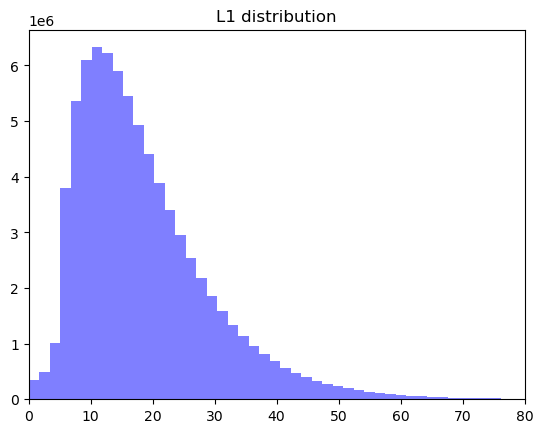

In [ ]:
# L1 distribution
column_data = data.iloc[:, 3]
summary = column_data.describe()
print(summary)

plt.hist(column_data, bins=100, color='blue', alpha=0.5)
plt.xlim([0, 80])  
plt.title('L1 distribution')
plt.show()

count    7.263424e+07
mean     8.578700e+01
std      7.255288e+01
min      1.336974e-04
25%      3.368539e+01
50%      6.786529e+01
75%      1.180406e+02
max      1.152915e+03
Name: L2 ppath, dtype: float64


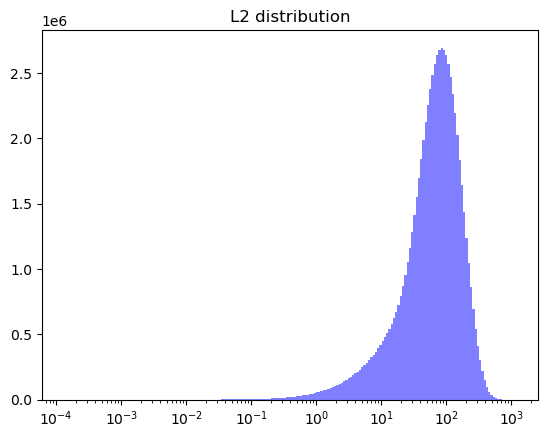

In [ ]:
# L2 distribution
column_data2 = data.iloc[:, 4]
column_data2 = column_data2[column_data2 > 0]
summary = column_data2.describe()
print(summary)

bins = np.logspace(np.log10(column_data2.min()), np.log10(column_data2.max()), 200)

# 绘制直方图
plt.hist(column_data2, bins=bins, color='blue', alpha=0.5)
plt.xscale('log')
plt.title('L2 distribution')
plt.show()


count    4.939288e+07
mean     4.472033e+02
std      7.987646e+02
min      1.477487e-04
25%      2.513409e+01
50%      1.189550e+02
75%      4.799707e+02
max      1.728097e+04
Name: L4 ppath, dtype: float64


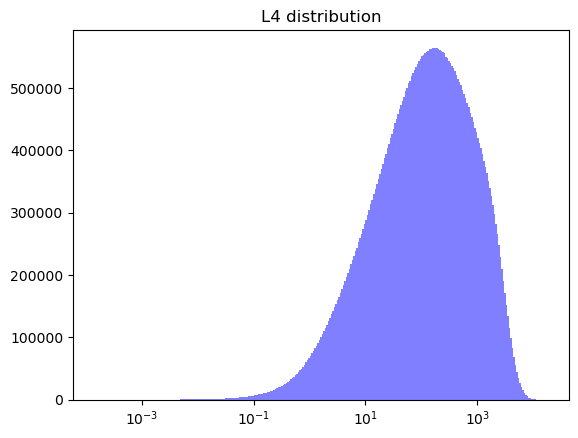

In [ ]:
column_data4 = data.iloc[:, 6]
column_data4 = column_data4[column_data4 > 0]
summary = column_data4.describe()
print(summary)


bins = np.logspace(np.log10(column_data4.min()), np.log10(column_data4.max()), 300)

plt.hist(column_data4, bins=bins, color='blue', alpha=0.5)
plt.xscale('log')
plt.title('L4 distribution')
plt.show()


## Extract Mom and fetal layer

In [ ]:
#Mom and fetal mixed
data_mix = data.iloc[:, [3,4,5,6]]


# 提取maternal layer
column_data1 = data.iloc[:, 3]
data_mom = pd.concat([column_data1, column_data2], axis=1)
data_mom.fillna(0, inplace=True)


In [ ]:
# data_mom
mom_value = (data_mom['L1 ppath'] + data['L1 ppath']).mean()
# point estimate
print(mom_value) #L1,L2 path求和均值

37.180732742862936


In [ ]:
# 提取fetal layer
data_fe = data.iloc[:, 6]
fe_mean = data_fe.mean()
# point estimate
print(fe_mean) #L4 path 均值

286.4386715001416


In [ ]:
#single-subject
data_pure = data[data.iloc[:, 6] != 0]
data_pure = data.iloc[:, [3,4,5,6]]

In [ ]:
data.to_pickle('Data/data.pkl')
data_mom.to_pickle('Data/data_mom.pkl')
data_fe.to_pickle('Data/data_fe.pkl')
data_mix.to_pickle('Data/data_mix.pkl')
data_pure.to_pickle('Data/data_pure.pkl')

data2.to_pickle('Data/data2.pkl')

In [ ]:
# 读取缓存数据
data = pd.read_pickle('Data/data.pkl')
df = data

## ua & intensity measurment

In [ ]:
# ua measurment

E_HB = 412.
E_HBO2 = 1464.
# 创建一个 6x6 的 DataFrame，数据初始化为 0
calcu = pd.DataFrame(0, index=[0, 1, 2, 3, 4, 5], columns=['comb1', 'comb2', 'comb3', 'comb4', 'comb5'])
calcu.loc[0] = np.linspace(0.9, 1.0, num=5)  #saturation
calcu.loc[1] = np.linspace(12, 16, num=5)  # concentration in maternal
calcu.loc[1] = calcu.loc[1] * 10 / 64500  # concentration unit in M/L
calcu.index = ['spo2', 'concentration', 'Hb', 'Hbo2', 'ua(mm-1)','intensity']
calcu.iloc[3] = calcu.iloc[1] * (1 - calcu.iloc[0])
calcu.iloc[2] = calcu.iloc[1]  - calcu.iloc[3]

# 假定Hb摩尔吸光系数是1,464 HbO2是412  
calcu.iloc[4] = calcu.iloc[1]  
calcu.iat[4, 0] = 2.303 * calcu.iat[4, 0] * (calcu.iat[0, 0] * 412 + (1-calcu.iat[0, 0]) * 1464) /10
calcu.iat[4, 1] = 2.303 * calcu.iat[4, 1] * (calcu.iat[0, 1] * 412 + (1-calcu.iat[0, 1]) * 1464) /10
calcu.iat[4, 2] = 2.303 * calcu.iat[4, 2] * (calcu.iat[0, 2] * 412 + (1-calcu.iat[0, 2]) * 1464) /10
calcu.iat[4, 3] = 2.303 * calcu.iat[4, 3] * (calcu.iat[0, 3] * 412 + (1-calcu.iat[0, 3]) * 1464) /10
calcu.iat[4, 4] = 2.303 * calcu.iat[4, 4] * (calcu.iat[0, 4] * 412 + (1-calcu.iat[0, 4]) * 1464) /10   # Conversion to mm-1

calcu.iat[5, 0] = calcu.iat[4, 0] * 37.180732742862936
calcu.iat[5, 1] = calcu.iat[4, 1] * 37.180732742862936
calcu.iat[5, 2] = calcu.iat[4, 2] * 37.180732742862936
calcu.iat[5, 3] = calcu.iat[4, 3] * 37.180732742862936
calcu.iat[5, 4] = calcu.iat[4, 4] * 37.180732742862936
print(calcu)


                  comb1     comb2     comb3     comb4     comb5
spo2           0.900000  0.925000  0.950000  0.975000  1.000000
concentration  0.001860  0.002016  0.002171  0.002326  0.002481
Hb             0.001674  0.001864  0.002062  0.002267  0.002481
Hbo2           0.000186  0.000151  0.000109  0.000058  0.000000
ua(mm-1)       0.221602  0.227861  0.232242  0.234745  0.235370
intensity      8.239331  8.472051  8.634942  8.728003  8.751235


count    7.711479e+07
mean     1.194409e+02
std      1.413267e+01
min      1.100000e+02
25%      1.100000e+02
50%      1.140000e+02
75%      1.230000e+02
max      1.950000e+02
Name: X, dtype: float64


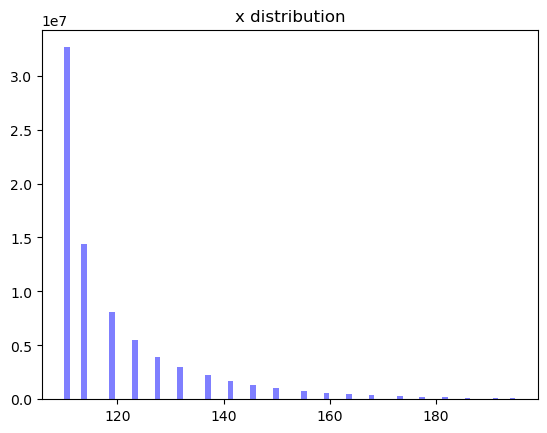

In [ ]:
# X distribution
column_x = data.iloc[:, 0]
summary = column_x.describe()
print(summary)

plt.hist(column_x, bins=80, color='blue', alpha=0.5)
plt.title('x distribution')
plt.show()

## X 与 L 的相关性

In [ ]:
#X 与 L1 之间相关性
correlation = data.iloc[:, 0].corr(data.iloc[:, 3])
print(correlation)

0.17710552639301377


In [ ]:
# 因果性回归分析
X = data.iloc[:, 0]
Y = data.iloc[:, 3]

# 给一个常数项，因为 statsmodels 的 OLS 回归默认不包含常数项
X = sm.add_constant(X)

model = sm.OLS(Y, X)
results = model.fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:               L1 ppath   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                 2.497e+06
Date:                Mon, 31 Jul 2023   Prob (F-statistic):               0.00
Time:                        00:24:12   Log-Likelihood:            -2.9226e+08
No. Observations:            77114786   AIC:                         5.845e+08
Df Residuals:                77114784   BIC:                         5.845e+08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3060      0.010    222.221      0.0

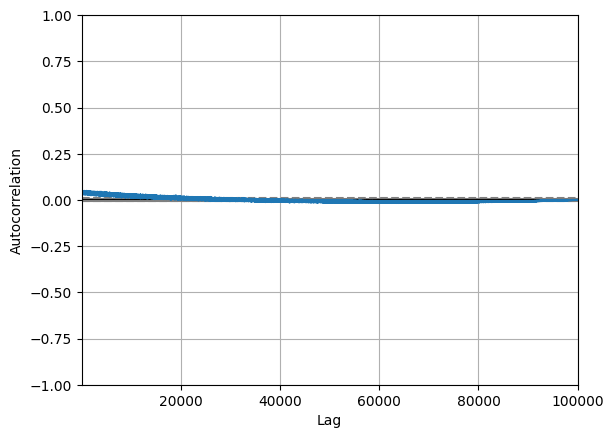

In [ ]:
# X时间序列自相关图
# pd.plotting.autocorrelation_plot(data.iloc[:, 0])
# plt.show()

df_subset = df.iloc[:100000, 0]  # 只选取前 10000 个数据
pd.plotting.autocorrelation_plot(df_subset)
plt.show()


In [ ]:
print(df.corr())  # 计算相关系数

print(df[df['X'] == 110]['L1 ppath'].mean())  # 当列1为110时，列2的平均值

                 X   Y   Z  L1 ppath  L2 ppath  L3 ppath  L4 ppath
X         1.000000 NaN NaN  0.177106  0.530090  0.602344  0.597909
Y              NaN NaN NaN       NaN       NaN       NaN       NaN
Z              NaN NaN NaN       NaN       NaN       NaN       NaN
L1 ppath  0.177106 NaN NaN  1.000000  0.414618  0.212065  0.115594
L2 ppath  0.530090 NaN NaN  0.414618  1.000000  0.774590  0.428999
L3 ppath  0.602344 NaN NaN  0.212065  0.774590  1.000000  0.471194
L4 ppath  0.597909 NaN NaN  0.115594  0.428999  0.471194  1.000000
15.949969330061572


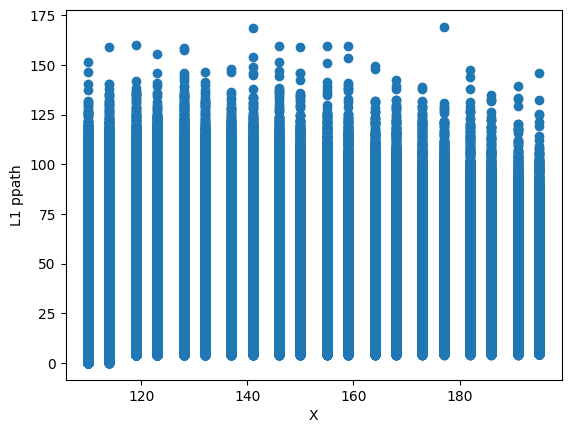

In [ ]:
# 散点图分析
plt.scatter(df['X'], df['L1 ppath'])
plt.xlabel('X')
plt.ylabel('L1 ppath')
plt.show()


In [ ]:
intensity = (df.iloc[:, 4] * 0.09 + df.iloc[:, 5] * 0.1).sum()

print("intensity:",intensity)

intensity: 692077847.4577563


## ua and spo2 inverse validation

In [ ]:
import pickle
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
# 读取缓存数据
data = pd.read_pickle('Data/data.pkl')
data2 = pd.read_pickle('Data/data2.pkl')
df = data
df2 = data2


In [ ]:
# input photon number: 120M
# SD=1cm

# (1) 735nm
# Maternal Abdominal Wall: mu_a=0.0091(mm^-1) mu_s=11.816(mm^-1)
# Maternal Uterus: mu_a=0.0158 (mm^-1) mu_s=10.575(mm^-1)
# Amniotic Fluid: mu_a=0.0125 (mm^-1) mu_s=0.1(mm^-1)
# Fetal Tissues: mu_a=0.013(mm^-1) mu_s=12.5(mm^-1)

# (2) 850nm
# Maternal Abdominal Wall: mu_a=0.0087(mm^-1) mu_s=11.169(mm^-1)
# Maternal Uterus: mu_a=0.0991 (mm^-1) mu_s=8.125(mm^-1)
# Amniotic Fluid: mu_a=0.0042 (mm^-1) mu_s=0.1(mm^-1)
# Fetal Tissues: mu_a=0.012 (mm^-1) mu_s=9.916(mm^-1)


ua_baseline = {
    'L1': [0.0091, 0.0087],
    'L2': [0.0158, 0.0991],
    'L3': [0.0125, 0.042],
    'L4': [0.013, 0.012]
}

# 定义行名
index = ['735nm', '850nm']

# 创建 DataFrame
ua_base = pd.DataFrame(ua_baseline, index=index) # ua_base in mm^-1

print(ua_base)


           L1      L2      L3     L4
735nm  0.0091  0.0158  0.0125  0.013
850nm  0.0087  0.0991  0.0420  0.012


In [ ]:
df = df[df['X'] == 110]
print("Lpath table in 735nm:\n",df)

df2 = df2[df2['X'] == 110]
print("Lpath table in 850nm:\n",df2)


L1_sum1 = df['L1 ppath'].sum()
L2_sum1 = df['L2 ppath'].sum()
L3_sum1 = df['L3 ppath'].sum()
L4_sum1 = df['L4 ppath'].sum()
factors1 = [L1_sum1, L2_sum1, L3_sum1, L4_sum1]  

L1_sum2 = (df2['L1 ppath'].sum()) 
L2_sum2 = (df2['L2 ppath'].sum()) 
L3_sum2 = (df2['L3 ppath'].sum()) 
L4_sum2 = (df2['L4 ppath'].sum()) 
factors2 = [L1_sum2, L2_sum2, L3_sum2, L4_sum2]  

print("Lsum_735nm:\n",L1_sum1,L2_sum1,L3_sum1,L4_sum1)
print("Lsum_850nm:\n",L1_sum2,L2_sum2,L3_sum2,L4_sum2)

Lpath table in 735nm:
               X      Y     Z   L1 ppath    L2 ppath  L3 ppath    L4 ppath
0         110.0  100.0  57.0   0.476788    0.000000  0.000000    0.000000
1         110.0  100.0  57.0   0.090936    0.000000  0.000000    0.000000
2         110.0  100.0  57.0   0.252443    0.000000  0.000000    0.000000
3         110.0  100.0  57.0   0.101483    0.000000  0.000000    0.000000
4         110.0  100.0  57.0   0.377466    0.000000  0.000000    0.000000
...         ...    ...   ...        ...         ...       ...         ...
77114774  110.0  100.0  57.0  14.124407  113.064194  7.471338  133.253845
77114775  110.0  100.0  57.0  19.294949   71.360977  2.575017    1.312971
77114776  110.0  100.0  57.0  16.959768    7.122466  0.000000    0.000000
77114780  110.0  100.0  57.0  11.035344   10.911086  0.000000    0.000000
77114783  110.0  100.0  57.0  15.257168   26.650251  0.000000    0.000000

[32635674 rows x 7 columns]
Lpath table in 850nm:
               X      Y     Z   L1 ppa

In [ ]:
#全局扰动因子
DISTURBANCE_FACTOR = 0.01

In [ ]:
# 735nm
ua_735 = (ua_base.iloc[0])

ua_vary1 = pd.DataFrame(columns=ua_base.columns)

# 进行 1w 次扰动并添加到ua_vary1
for _ in range(10000):
    disturbance = 1 + np.random.uniform(0, DISTURBANCE_FACTOR)
    disturbed_L1 = ua_735['L1'] * disturbance
    new_row = ua_735.copy()
    new_row['L1'] = disturbed_L1
    
    ua_vary1 = pd.concat([ua_vary1, pd.DataFrame([new_row])], ignore_index=True)

# print("扰动后735nm下ua:\n",ua_vary1)

ac_sum1 = (ua_vary1 * factors1).sum(axis=1).to_frame(name='ac_sum1') 
print(ac_sum1)

dc_sum1 = (ua_735 * factors1).sum()

ratio_df1 = (ac_sum1['ac_sum1'] / dc_sum1) - 1
ratio1 = ratio_df1.to_frame(name='Ratio1')
print("AC/DC Ratio1: \n", ratio1)


           ac_sum1
0     4.526230e+07
1     4.523853e+07
2     4.526687e+07
3     4.524343e+07
4     4.527124e+07
...            ...
9995  4.526347e+07
9996  4.526019e+07
9997  4.525535e+07
9998  4.523224e+07
9999  4.523967e+07

[10000 rows x 1 columns]
AC/DC Ratio1: 
         Ratio1
0     0.000750
1     0.000224
2     0.000851
3     0.000332
4     0.000947
...        ...
9995  0.000776
9996  0.000703
9997  0.000596
9998  0.000085
9999  0.000249

[10000 rows x 1 columns]


In [ ]:
# 850nm
ua_850 = ua_base.iloc[1]

ua_vary2 = pd.DataFrame(columns=ua_base.columns)

# 进行 1w 次扰动并添加到ua_vary2
for _ in range(10000):
    disturbance = 1 + np.random.uniform(0, DISTURBANCE_FACTOR)
    disturbed_L1 = ua_850['L1'] * disturbance
    new_row = ua_850.copy()
    new_row['L1'] = disturbed_L1
    
    ua_vary2 = pd.concat([ua_vary2, pd.DataFrame([new_row])], ignore_index=True)
 
# print("扰动后850nm下ua:\n",ua_vary2)

ac_sum2 = (ua_vary2 * factors2).sum(axis=1).to_frame(name='ac_sum2') - 1
# print(ac_sum1)

dc_sum2 = (ua_850 * factors2).sum()

ratio_df2 = (ac_sum2['ac_sum2'] / dc_sum2) - 1
ratio2 = ratio_df2.to_frame(name='Ratio2')
print("AC/DC Ratio2: \n", ratio2)



AC/DC Ratio2: 
         Ratio2
0     0.000245
1     0.000175
2     0.000084
3     0.000151
4     0.000185
...        ...
9995  0.000141
9996  0.000277
9997  0.000269
9998  0.000059
9999  0.000038

[10000 rows x 1 columns]


In [ ]:
## 735nm, 850nm 波长下比值
final_ratio = (ratio1['Ratio1'] )/ (ratio2['Ratio2']) 
final_df = final_ratio.to_frame(name='FinalRatio')

print(final_df)

      FinalRatio
0       3.065837
1       1.282735
2      10.103864
3       2.206552
4       5.109835
...          ...
9995    5.514047
9996    2.537090
9997    2.214923
9998    1.432608
9999    6.642922

[10000 rows x 1 columns]


          Spo2
0    -0.589327
1     0.303662
2    -1.973307
3    -0.218984
4    -1.201894
...        ...
9995 -1.293179
9996 -0.372269
9997 -0.223054
9998  0.207660
9999 -1.512789

[10000 rows x 1 columns]


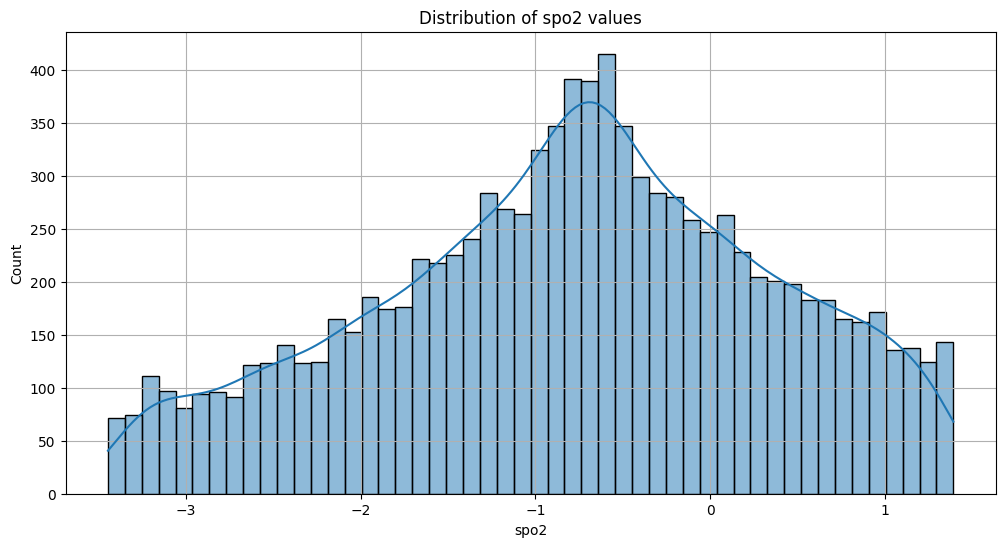

In [ ]:
# SpO2 validation


# extinction cofficient
#        735nm  850nm (in cm^-1/M)
# EHbO2   412   1058
# EHb     1464  820

ex_cofficient = {
    '735nm': [412, 1464],
    '850nm': [1058, 820]
}
index2 = ['EHbO2', 'EHb']
ex_co = pd.DataFrame(ex_cofficient, index=index2) # ex_co in cm^-1/M
# print(ex_co)


# Calculate spo2
def calculate_spo2(Ratio):
    return (ex_co.iloc[1, 0] - (Ratio * ex_co.iloc[1, 1])) / (ex_co.iloc[1, 0] - ex_co.iloc[0, 0] + Ratio * (ex_co.iloc[0, 1] - ex_co.iloc[1, 1]))

spo2_df = final_df['FinalRatio'].apply(calculate_spo2).to_frame(name='Spo2')

print(spo2_df)


# Plotting the distribution of spo2 values
plt.figure(figsize=(12, 6))
sns.histplot(spo2_df['Spo2'], kde=True, bins=50)
plt.title('Distribution of spo2 values')
plt.xlabel('spo2')
plt.ylabel('Count')
plt.grid(True)
plt.show()



In [ ]:
# 估值范围
from sympy import symbols, Eq, solve

# Define the variable and constants
R = symbols('R')
a = ex_co.iloc[1, 0]
b = ex_co.iloc[1, 1]
c = ex_co.iloc[0, 0]
d = ex_co.iloc[0, 1]

# Set up the inequalities
inequality1 = Eq((a - (R * b)) / (a - c + R * (d - b)), 0)
inequality2 = Eq((a - (R * b)) / (a - c + R * (d - b)), 1)

# Solve for R (final_df values)
R_lower_bound = solve(inequality1, R)
R_upper_bound = solve(inequality2, R)
R_lower_bound_float = [float(val) for val in R_lower_bound]
R_upper_bound_float = [float(val) for val in R_upper_bound]

R_lower_bound_float, R_upper_bound_float


([1.7853658536585366], [0.389413988657845])

0.8919703581424618
0.8917963725152969
0.8916224742801189
0.8914486633711002
0.8912749397224781
0.8911013032685569
0.890927753943706
0.8907542916823618
0.8905809164190249
0.890407628088263
0.8902344266247088
0.8900613119630603
0.8898882840380814
0.8897153427846008
0.8895424881375134
0.889369720031778
0.8891970384024199
0.8890244431845283
0.888851934313258
0.8886795117238283
0.8885071753515236
0.8883349251316927
0.8881627609997493
0.8879906828911713
0.8878186907415017
0.8876467844863469
0.8874749640613786
0.8873032294023321
0.8871315804450071
0.8869600171252671
0.8867885393790399
0.886617147142317
0.8864458403511538
0.8862746189416696
0.8861034828500467
0.8859324320125322
0.8857614663654354
0.8855905858451298
0.8854197903880517
0.8852490799307019
0.8850784544096424
0.8849079137615004
0.8847374579229641
0.8845670868307868
0.8843968004217825
0.8842265986328302
0.8840564814008692
0.883886448662904
0.8837165003559994
0.8835466364172844
0.8833768567839488
0.8832071613932468
0.8830375501824925

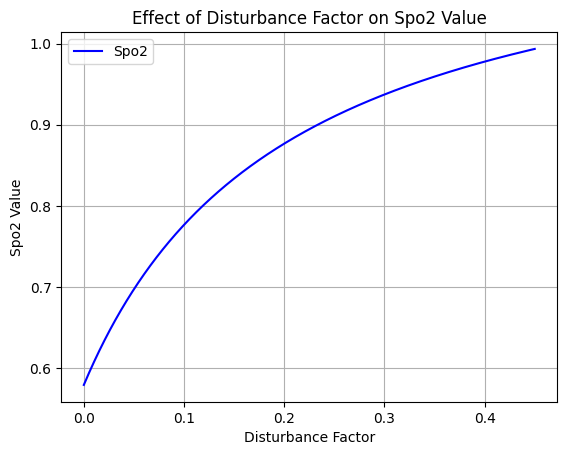

In [ ]:

DISTURBANCE_RANGE = np.linspace(0,0.45, 10000)  
spo2_results = []

for DISTURBANCE_FACTOR in DISTURBANCE_RANGE:
    # 735nm扰动和计算
    disturbance_735 =  DISTURBANCE_FACTOR
    disturbed_735_L1 = ua_735['L1'] * disturbance_735
    disturbed_735_L2 = ua_735['L2'] * disturbance_735
    new_ua_735 = ua_735.copy()
    new_ua_735['L1'] = disturbed_735_L1
    new_ua_735['L2'] = disturbed_735_L2
    # ac_735 = (new_ua_735 * factors1).sum() 
    # dc_735 = (ua_735 * factors1).sum()
    # ratio_735 = np.log((ac_735 / dc_735) - 1)
    ratio_735 =  (new_ua_735 * factors1).sum()  
 

    # 850nm扰动和计算
    disturbance_850 =  DISTURBANCE_FACTOR
    disturbed_850_L1 = ua_850['L1'] * disturbance_850
    disturbed_850_L2 = ua_850['L2'] * disturbance_850
    new_ua_850 = ua_850.copy()
    new_ua_850['L1'] = disturbed_850_L1
    new_ua_850['L2'] = disturbed_850_L2
    # ac_850 = (new_ua_850 * factors2).sum() 
    # dc_850 = (ua_850 * factors2).sum()
    # ratio_850 = np.log((ac_850 / dc_850) - 1)
    ratio_850 = (new_ua_850 * factors2).sum()

    # 计算最终比值
    final_ratio_value = (ratio_735 / ratio_850)
    print(final_ratio_value)
    spo2_value = calculate_spo2(final_ratio_value)

    # 将当前DISTURBANCE_FACTOR的Spo2值记录下来
    spo2_results.append(spo2_value)

# 可视化
plt.plot(DISTURBANCE_RANGE, spo2_results, label='Spo2', color='blue')
plt.xlabel('Disturbance Factor')
plt.ylabel('Spo2 Value')
plt.title('Effect of Disturbance Factor on Spo2 Value')
# plt.ylim(0.8, 1.1)  # 设置y轴的显示范围
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# 加入 平滑因子EPSILON
THRESHOLD = 1e-10
EPSILON = 1e-10
DISTURBANCE_RANGE = np.linspace(0, 0.45, 10000)
spo2_results = []

ua_735 = ua_base.iloc[0]
ua_850 = ua_base.iloc[1]

for DISTURBANCE_FACTOR in DISTURBANCE_RANGE:
    # 735nm 
    disturbance_735 = DISTURBANCE_FACTOR * np.random[0,1]
    disturbed_735_L1 = ua_735['L1'] * disturbance_735
    disturbed_735_L2 = ua_735['L2'] * disturbance_735
    new_ua_735 = ua_735.copy()
    new_ua_735['L1'] = disturbed_735_L1
    new_ua_735['L2'] = disturbed_735_L2
    new_ua_735['L3'] = 0
    new_ua_735['L4'] = 0
    ratio_735 = (new_ua_735 * factors1).sum()

    # 850nm 
    disturbance_850 = DISTURBANCE_FACTOR *  np.random[0,1]
    disturbed_850_L1 = ua_850['L1'] * disturbance_850 * 
    disturbed_850_L2 = ua_850['L2'] * disturbance_850
    new_ua_850 = ua_850.copy()
    new_ua_850['L1'] = disturbed_850_L1
    new_ua_850['L2'] = disturbed_850_L2
    new_ua_850['L3'] = 0
    new_ua_850['L4'] = 0

    ratio_850 = (new_ua_850 * factors2).sum()

    if abs(ratio_850) < THRESHOLD:
        spo2_results.append(np.nan)  # Append NaN or some default value
        continue

    # Calculate final ratio with added epsilon to denominator
    final_ratio_value = (ratio_735 / (ratio_850 + EPSILON))
    spo2_value = calculate_spo2(final_ratio_value)
    spo2_results.append(spo2_value)

# Visualization
plt.plot(DISTURBANCE_RANGE, spo2_results, label='Spo2', color='blue')
plt.xlabel('Disturbance Factor')
plt.ylabel('Spo2 Value')
plt.title('Effect of Disturbance Factor on Spo2 Value using Smoothing Strategy')
plt.legend()
plt.grid(True)
plt.show()


TypeError: 'module' object is not subscriptable

delta ua ---  Spo2 analysis

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

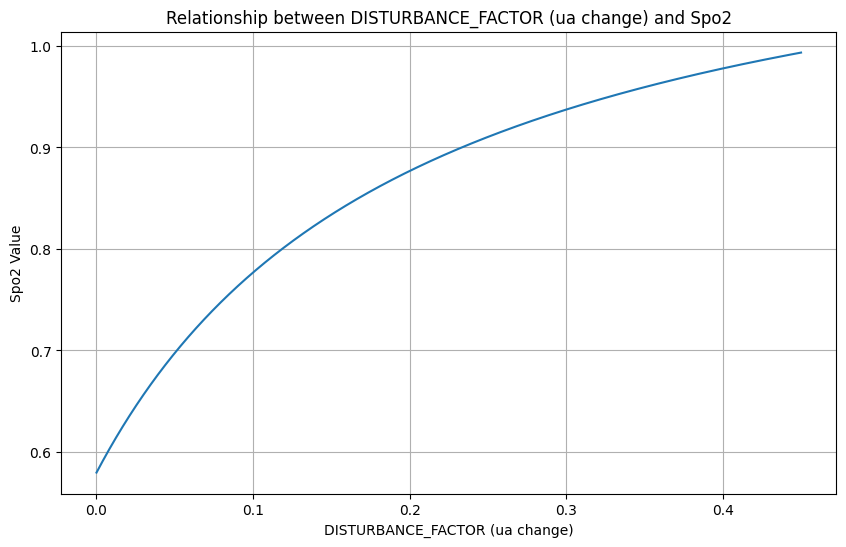

Pearson Correlation Coefficient between DISTURBANCE_FACTOR and Spo2: 0.957


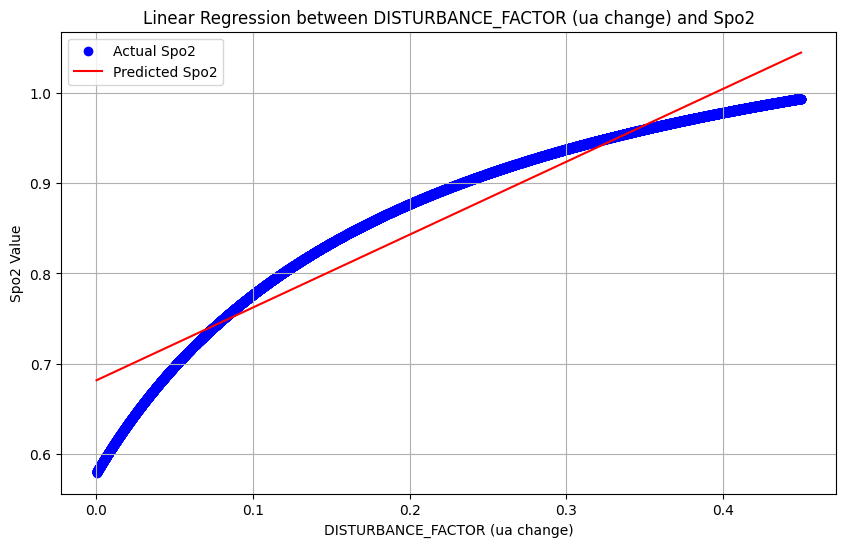

Regression Coefficient: 0.806
Regression Intercept: 0.682


In [ ]:
# 相关性分析
filtered_indices = (np.array(DISTURBANCE_RANGE) > 0) & (np.array(spo2_results) >= 0) & (np.array(spo2_results) <= 1)
filtered_disturbance = np.array(DISTURBANCE_RANGE)[filtered_indices]
filtered_spo2 = np.array(spo2_results)[filtered_indices]

# Visualization
plt.figure(figsize=(10, 6))
sns.lineplot(x=filtered_disturbance, y=filtered_spo2)
plt.title('Relationship between DISTURBANCE_FACTOR (ua change) and Spo2')
plt.xlabel('DISTURBANCE_FACTOR (ua change)')
plt.ylabel('Spo2 Value')
plt.grid(True)
plt.show()

# Correlation Analysis
correlation_coefficient, _ = pearsonr(filtered_disturbance, filtered_spo2)
print(f"Pearson Correlation Coefficient between DISTURBANCE_FACTOR and Spo2: {correlation_coefficient:.3f}")

# Regression Analysis (if correlation is strong)
if abs(correlation_coefficient) > 0.6:  # You can adjust this threshold as needed
    X = filtered_disturbance.reshape(-1, 1)
    y = filtered_spo2
    model = LinearRegression().fit(X, y)
    predicted_spo2 = model.predict(X)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Actual Spo2')
    plt.plot(X, predicted_spo2, color='red', label='Predicted Spo2')
    plt.title('Linear Regression between DISTURBANCE_FACTOR (ua change) and Spo2')
    plt.xlabel('DISTURBANCE_FACTOR (ua change)')
    plt.ylabel('Spo2 Value')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Regression Coefficient: {model.coef_[0]:.3f}")
    print(f"Regression Intercept: {model.intercept_:.3f}")


In [ ]:
# 第二组数据 
# (1) 735nm
# Maternal Abdominal Wall: mu_a=0.0094(mm^-1) mu_s=13.22(mm^-1)
# Maternal Uterus: mu_a=0.016 (mm^-1) mu_s=10.8(mm^-1)
# Amniotic Fluid: mu_a=0.0025 (mm^-1) mu_s=0.1(mm^-1)
# Fetal Tissues: mu_a=0.0187 (mm^-1) mu_s=12.33(mm^-1)

# (1) 850nm
# Maternal Abdominal Wall: mu_a=0.009(mm^-1) mu_s=12(mm^-1)
# Maternal Uterus: mu_a=0.01 (mm^-1) mu_s=8.15(mm^-1)
# Amniotic Fluid: mu_a=0.0042 (mm^-1) mu_s=0.1(mm^-1)
# Fetal Tissues: mu_a=0.013 (mm^-1) mu_s=9.916(mm^-1)

# ua
ua_baseline = {
    'L1': [0.0094, 0.009],
    'L2': [0.016, 0.01],
    'L3': [0.0025, 0.0042],
    'L4': [0.0187, 0.013]
}

index = ['735nm', '850nm']
ua_base = pd.DataFrame(ua_baseline, index=index) # ua_base in mm^-1


# L path
column_names = ["L1 ppath", "L2 ppath", "L3 ppath", "L4 ppath"]
df = pd.read_csv('735nm.csv', header=None, names=column_names)
df2 = pd.read_csv('850nm.csv', header=None, names=column_names)

print("Lpath table in 735nm:\n",df)

L1_sum1 = df['L1 ppath'].sum()
L2_sum1 = df['L2 ppath'].sum()
L3_sum1 = df['L3 ppath'].sum()
L4_sum1 = df['L4 ppath'].sum()
factors1 = [L1_sum1, L2_sum1, L3_sum1, L4_sum1]  

L1_sum2 = (df2['L1 ppath'].sum()) 
L2_sum2 = (df2['L2 ppath'].sum()) 
L3_sum2 = (df2['L3 ppath'].sum()) 
L4_sum2 = (df2['L4 ppath'].sum()) 
factors2 = [L1_sum2, L2_sum2, L3_sum2, L4_sum2]  

print("Lsum_735nm:\n",L1_sum1,L2_sum1,L3_sum1,L4_sum1)
print("Lsum_850nm:\n",L1_sum2,L2_sum2,L3_sum2,L4_sum2)

Lpath table in 735nm:
         L1 ppath  L2 ppath   L3 ppath    L4 ppath
0       76.84739    0.0000   0.000000    0.000000
1       93.96909    0.0000   0.000000    0.000000
2       70.63559    0.0000   0.000000    0.000000
3       54.34265    0.0000   0.000000    0.000000
4      101.69130    0.0000   0.000000    0.000000
...          ...       ...        ...         ...
83859  107.90170    0.0000   0.000000    0.000000
83860  150.27000    0.0000   0.000000    0.000000
83861  555.48130  431.8528  24.556650  134.946600
83862  184.06810    0.0000   0.000000    0.000000
83863  395.96010  198.6439   6.414731    1.391333

[83864 rows x 4 columns]
Lsum_735nm:
 22165406.220060002 3487699.8384394334 204635.96307954998 689404.021014835
Lsum_850nm:
 22165406.220060002 3487699.8384394334 204635.96307954998 689404.021014835


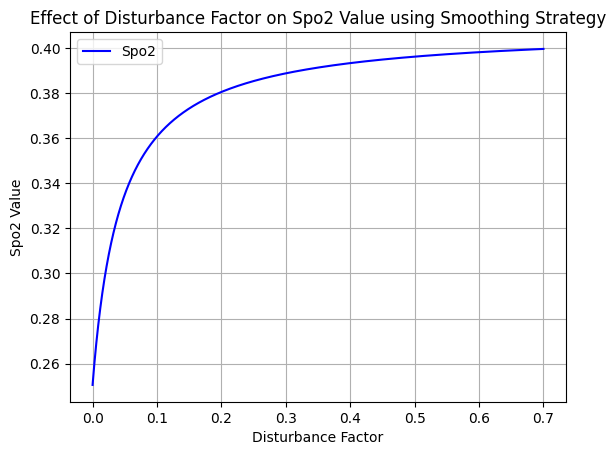

In [ ]:
# 加入 平滑因子EPSILON
THRESHOLD = 1e-10
EPSILON = 1e-10
DISTURBANCE_RANGE = np.linspace(0, 0.7, 10000)
spo2_results = []

ua_735 = ua_base.iloc[0]
ua_850 = ua_base.iloc[1]

for DISTURBANCE_FACTOR in DISTURBANCE_RANGE:
    # 735nm 
    disturbance_735 = DISTURBANCE_FACTOR
    disturbed_735_L1 = ua_735['L1'] * disturbance_735
    disturbed_735_L2 = ua_735['L2'] * disturbance_735
    new_ua_735 = ua_735.copy()
    new_ua_735['L1'] = disturbed_735_L1
    new_ua_735['L2'] = disturbed_735_L2
    ratio_735 = (new_ua_735 * factors1).sum()

    # 850nm 
    disturbance_850 = DISTURBANCE_FACTOR
    disturbed_850_L1 = ua_850['L1'] * disturbance_850
    disturbed_850_L2 = ua_850['L2'] * disturbance_850
    new_ua_850 = ua_850.copy()
    new_ua_850['L1'] = disturbed_850_L1
    new_ua_850['L2'] = disturbed_850_L2
    ratio_850 = (new_ua_850 * factors2).sum()

    if abs(ratio_850) < THRESHOLD:
        spo2_results.append(np.nan)  # Append NaN or some default value
        continue

    # Calculate final ratio with added epsilon to denominator
    final_ratio_value = (ratio_735 / (ratio_850 + EPSILON))
    spo2_value = calculate_spo2(final_ratio_value)
    spo2_results.append(spo2_value)

# Visualization
plt.plot(DISTURBANCE_RANGE, spo2_results, label='Spo2', color='blue')
plt.xlabel('Disturbance Factor')
plt.ylabel('Spo2 Value')
plt.title('Effect of Disturbance Factor on Spo2 Value using Smoothing Strategy')
plt.legend()
plt.grid(True)
plt.show()

     Y_position  Ratio on baseline
0        0.0025            1.00000
1        0.0075            1.04050
2        0.0125            1.00580
3        0.0175            0.99639
4        0.0225            1.05200
..          ...                ...
195      0.9775            1.00720
196      0.9825            1.06360
197      0.9875            1.00290
198      0.9925            1.03540
199      0.9975            1.02100

[200 rows x 2 columns]


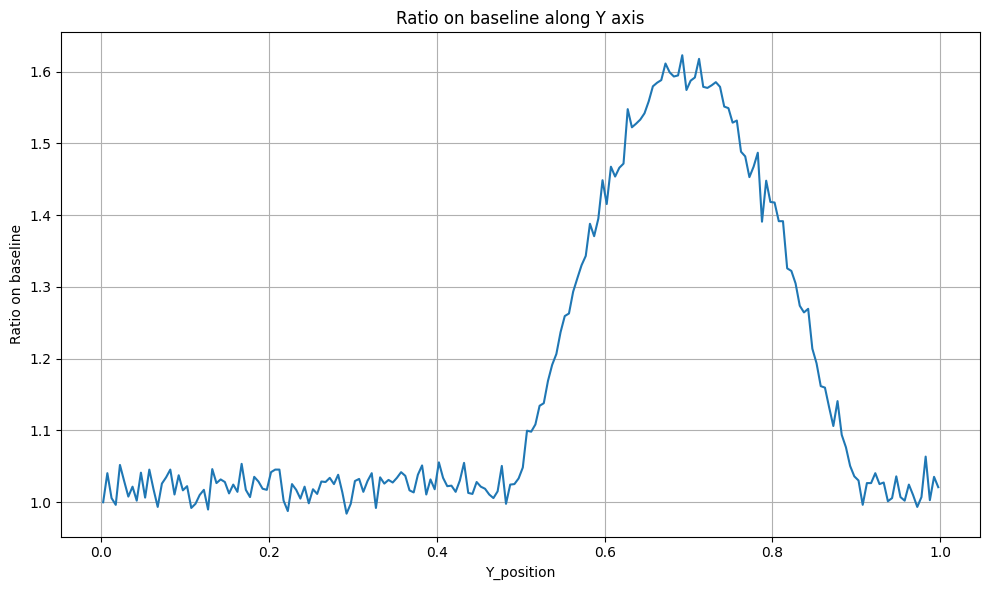

In [ ]:
column_names_beta = ["Y_position", "Ratio on baseline", ]
df3 = pd.read_csv('D:\Codes\mc_xyz\mcxyz_22july2019\sampled_data.csv', header=None, names=column_names_beta)
df3['Y_position'] = (df3['Y_position'] + 0.05) * 10

df3 = df3.groupby('Y_position')['Ratio on baseline'].mean().reset_index()
print(df3)

plt.figure(figsize=(10, 6))
plt.plot(df3['Y_position'], df3['Ratio on baseline'])
plt.title("Ratio on baseline along Y axis")
plt.xlabel("Y_position")
plt.ylabel("Ratio on baseline")
plt.grid(True)
plt.tight_layout()
plt.show()
